<a href="https://colab.research.google.com/github/ElChris496/AdministracionParqueo/blob/master/DML_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### Reading Data


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/devferx/datasets/main/voice.csv")

In [ ]:
df.head(80)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.190325,0.051696,0.191410,0.156900,0.220584,0.063685,1.461859,5.360319,0.918001,0.362344,...,0.190325,0.152013,0.021136,0.246154,0.884549,0.007812,6.718750,6.710938,0.211735,male
76,0.187139,0.056499,0.176109,0.143045,0.247632,0.104587,1.411153,4.149302,0.902247,0.298599,...,0.187139,0.138198,0.016684,0.231884,0.801339,0.125000,6.640625,6.515625,0.127006,male
77,0.184355,0.055494,0.183431,0.150900,0.226350,0.075450,1.588014,8.990048,0.932835,0.427755,...,0.184355,0.133717,0.018519,0.266667,1.795625,0.007812,7.000000,6.992188,0.316104,male
78,0.200042,0.055815,0.210792,0.166599,0.243478,0.076879,2.926781,15.253787,0.914634,0.412919,...,0.200042,0.159107,0.020101,0.266667,0.622656,0.156250,6.390625,6.234375,0.119744,male


In [ ]:
df.shape

(3168, 21)

In [ ]:
print(df.columns)

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')


In [ ]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sfm       3168 non-null   float64
 9   mode      3168 non-null   float64
 10  centroid  3168 non-null   float64
 11  meanfun   3168 non-null   float64
 12  minfun    3168 non-null   float64
 13  maxfun    3168 non-null   float64
 14  label     3168 non-null   int64  
dtypes: float64(14), int64(1)
memory usage: 371.4 KB


In [ ]:
a = df.label.value_counts()
print(a)
print("TOTAL: ", df.label.count())

male      1584
female    1584
Name: label, dtype: int64
TOTAL:  3168


In [ ]:
df.corr()

<ipython-input-44-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


Nuestra función de 'label' tiene 2 valiosas. hombre y mujer. Estas son cadenas pero necesitamos números enteros para la clasificación. por lo tanto, debemos convertirlos de objeto a entero.


In [ ]:
df = df.drop('meandom', axis=1)
df = df.drop('mindom', axis=1)
df = df.drop('maxdom', axis=1)
df = df.drop('dfrange', axis=1)
df = df.drop('modindx', axis=1)

In [ ]:
df.label = [1 if each == "female" else 0 for each in df.label]
## Asignamos 1 a female y 0 a male

In [ ]:
df.label

0       0
1       0
2       0
3       0
4       0
       ..
3163    1
3164    1
3165    1
3166    1
3167    1
Name: label, Length: 3168, dtype: int64

### Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba

In [ ]:
y = df.label.values
x = df.drop(['label'], axis="columns")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 50)
# test_size=0.2 mean (%20) test data, train data %80
algo_names = []
algo_scores = []

In [ ]:
x_train.shape

(2534, 14)

In [ ]:
x_test.shape

(634, 14)

In [ ]:
df = df.drop('sp.ent', axis=1)

KeyError: ignored

In [ ]:
x_train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sfm,mode,centroid,meanfun,minfun,maxfun
974,0.188291,0.060757,0.196792,0.128553,0.243459,0.114906,1.924342,6.921315,0.359334,0.117107,0.188291,0.130205,0.048096,0.274286
2769,0.187396,0.044700,0.185598,0.171349,0.206260,0.034911,2.454544,9.671798,0.354332,0.174198,0.187396,0.155880,0.048534,0.277457
1805,0.177266,0.033878,0.175619,0.166018,0.188938,0.022920,3.261121,14.297520,0.226999,0.164469,0.177266,0.164342,0.020833,0.250000
175,0.134962,0.062047,0.111388,0.088780,0.189571,0.100791,2.317095,9.072179,0.560896,0.104794,0.134962,0.086565,0.016277,0.275862
1919,0.097562,0.070847,0.071001,0.038766,0.158224,0.119458,1.430850,4.652448,0.664712,0.038555,0.097562,0.148914,0.019851,0.222222


In [ ]:
x_train.tail()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sfm,mode,centroid,meanfun,minfun,maxfun
2014,0.142297,0.083138,0.169747,0.058402,0.217596,0.159194,1.963700,7.248161,0.700716,0.229604,0.142297,0.178167,0.017877,0.238806
2157,0.183551,0.033172,0.187811,0.178004,0.196637,0.018634,3.361455,14.422563,0.235786,0.192715,0.183551,0.177953,0.060377,0.246154
1931,0.162205,0.069786,0.182035,0.136821,0.210530,0.073709,4.105541,35.655663,0.575286,0.000000,0.162205,0.149335,0.027257,0.225352
1504,0.117170,0.076995,0.108125,0.050000,0.201406,0.151406,10.649260,228.008040,0.653185,0.000000,0.117170,0.111191,0.015640,0.258065
1712,0.240844,0.053585,0.256984,0.236169,0.268792,0.032623,3.203079,14.252101,0.201548,0.268392,0.240844,0.225755,0.062745,0.275862


## Aplicando diferentes modelos ahora
**Decission Tree**

In [ ]:
dec_tree = DecisionTreeClassifier(random_state = 50)
dec_tree.fit(x_train, y_train)
print("Decision Tree Classification Score: ", dec_tree.score(x_test, y_test))
algo_names.append("Decision Tree")
algo_scores.append(dec_tree.score(x_test, y_test))
p1 = dec_tree.predict(x_test)

Decision Tree Classification Score:  0.9542586750788643


Predicted Labels: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Random Forest

In [ ]:
rand_forest = RandomForestClassifier(random_state = 50)
rand_forest.fit(x_train, y_train)
print("Random Forest Classification Score: ", rand_forest.score(x_test, y_test))
algo_names.append("Random Forest")
algo_scores.append(rand_forest.score(x_test, y_test))
p2 = rand_forest.predict(x_test)

Random Forest Classification Score:  0.9747634069400631


In [ ]:
data = [[0.21153480074277592, 0.1329567094470016, 0.16606604249701254, 1.1176387240048147, 0.24878989012916425, 0.13702601772868278, 2.115348007427759, 21.153480074277592, 0.6460113916546106, 0.001, 0.21153480074277592, -3.771280717046466e-07, 0.3803005, 0.40661716]]
prediction_rf = rand_forest.predict(data)
print("Random Forest Predicted Labels:", prediction_rf)


Random Forest Predicted Labels: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


SVM

In [ ]:
svm = SVC(random_state = 50)
svm.fit(x_train, y_train)
print("SVM Classification Score is: {}".format(svm.score(x_test, y_test)))
algo_names.append("SVM")
algo_scores.append(svm.score(x_test, y_test))
p3 = svm.predict(x_test)

SVM Classification Score is: 0.5425867507886435


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(x_test, y_test)
print("Naive Bayes Classification Score: {}".format(naive_bayes.score(x_test, y_test)))
algo_names.append("Naive Bayes")
algo_scores.append(naive_bayes.score(x_test, y_test))
p4 = naive_bayes.predict(x_test)

Naive Bayes Classification Score: 0.9148264984227129


### Comparación


Text(0, 0.5, 'Algorithm Score')

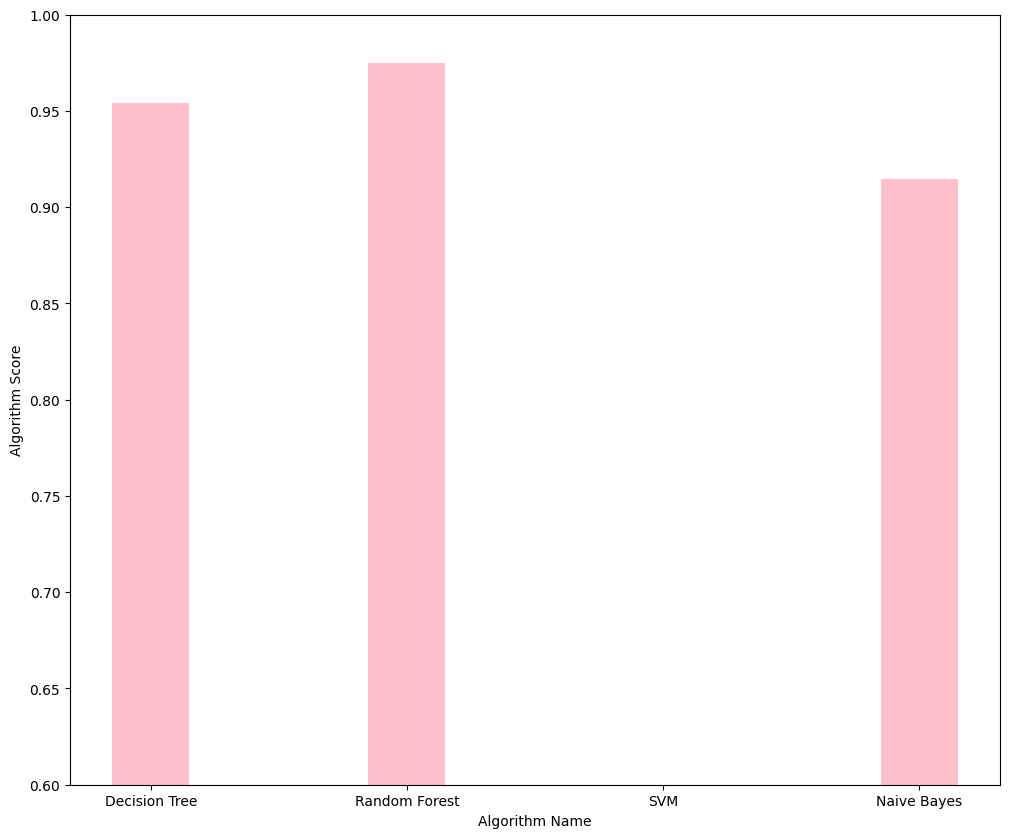

In [ ]:
plt.figure(figsize = (12, 10))
plt.ylim([0.60, 1])
plt.bar(algo_names, algo_scores, width=0.3, color=['pink'])
plt.xlabel("Algorithm Name")
plt.ylabel("Algorithm Score")

imprimir el reporte de clasificacion de los modelos usados

In [ ]:
from sklearn.metrics import classification_report

clasificacion del desicion tree

In [ ]:
report_dec_tree = classification_report(y_test,p1)
print(report_dec_tree)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       310
           1       0.96      0.96      0.96       324

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



clasificacion del random forest

In [ ]:
report_random_forest = classification_report(y_test,p2)
print(report_random_forest)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       310
           1       0.96      0.98      0.97       324

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



clasificacion del svm

In [ ]:
report_svm = classification_report(y_test,p3)
print(report_svm)

              precision    recall  f1-score   support

           0       0.52      0.87      0.65       310
           1       0.65      0.23      0.34       324

    accuracy                           0.54       634
   macro avg       0.58      0.55      0.49       634
weighted avg       0.59      0.54      0.49       634



clasificacion de naive bayes

In [ ]:
report_naive_bayes = classification_report(y_test,p4)
print(report_naive_bayes)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       310
           1       0.91      0.90      0.90       324

    accuracy                           0.90       634
   macro avg       0.90      0.90      0.90       634
weighted avg       0.90      0.90      0.90       634



diferenciando las predicicones correctas vs las erroneas

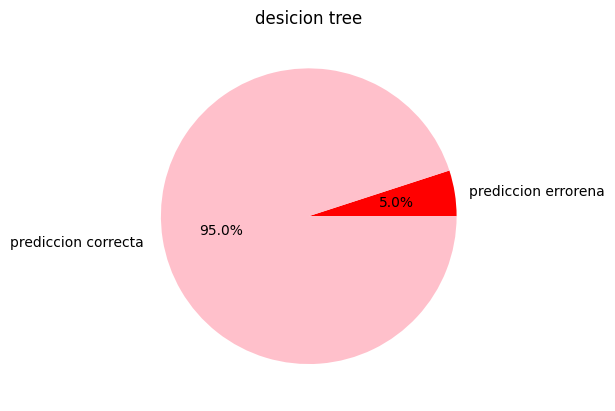

In [ ]:
comp1 = [31.7,602.3]
l1 = ['prediccion errorena','prediccion correcta ']
plt.pie(comp1,labels = l1, autopct = '%0.1f%%',colors = ['red','pink'])
plt.title('desicion tree')
plt.show()

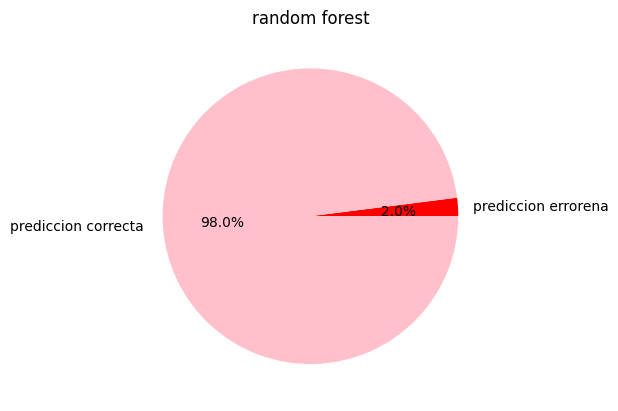

In [ ]:
comp2 = [12.68,621.32]
l2 = ['prediccion errorena','prediccion correcta ']
plt.pie(comp2,labels = l2,autopct = '%0.1f%%',colors = ['red','pink'])
plt.title("random forest")
plt.show()

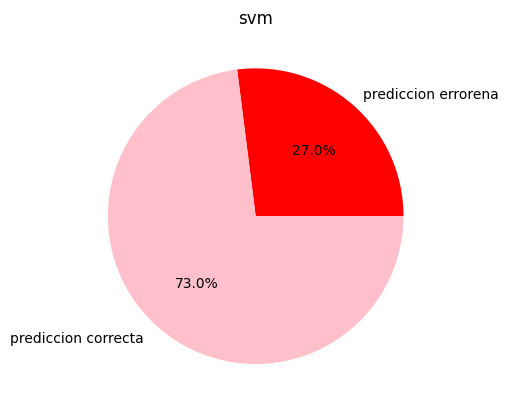

In [ ]:
comp3 = [171.18,462.82]
l3 = ['prediccion errorena','prediccion correcta ']
plt.pie(comp3,labels = l3,autopct = '%0.1f%%',colors = ['red','pink'])
plt.title("svm")
plt.show()

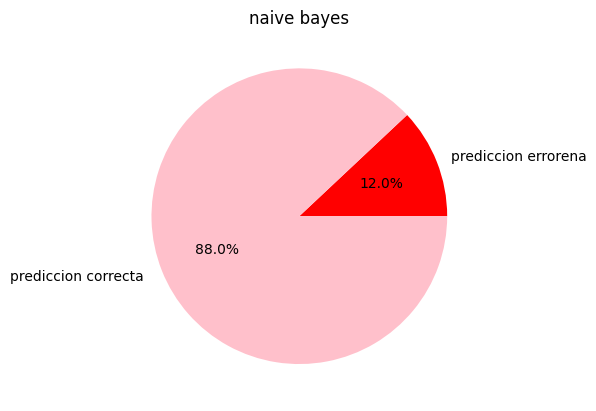

In [ ]:
comp3 = [76.08,557.92]
l3 = ['prediccion errorena','prediccion correcta ']
plt.pie(comp3,labels = l3,autopct = '%0.1f%%',colors = ['red','pink'])
plt.title("naive bayes")
plt.show()

prueba

In [ ]:
import librosa
import numpy as np

In [ ]:
def extract_voice_features(audio_path):

  y, sr = librosa.load(audio_path)

  meanfreq = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
  sd = np.std(librosa.feature.spectral_centroid(y=y, sr=sr))
  median = np.median(librosa.feature.spectral_centroid(y=y, sr=sr))
  Q25 = np.percentile(librosa.feature.spectral_centroid(y=y, sr=sr), 25)/1000
  Q75 = np.percentile(librosa.feature.spectral_centroid(y=y, sr=sr), 75)/1000
  IQR = Q75 - Q25
  skew = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
  kurt = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
  sfm = np.mean(librosa.feature.spectral_flatness(y=y))
  mode = float(librosa.feature.tempogram(y=y, sr=sr)[0][0])
  centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
  meanfun = np.mean(librosa.effects.harmonic(y=y))
  minfun = np.min(librosa.effects.harmonic(y=y))
  maxfun = np.max(librosa.effects.harmonic(y=y))



  return meanfreq/10000, sd/10000, median/10000, Q25, Q75/10, IQR/10, skew/1000, kurt/100, sfm*100, mode/1000, centroid/10000, meanfun/10, abs(minfun), maxfun

In [ ]:
# Ruta del archivo de audio
audio_ruta = '/content/rodri.wav'

# Obtener las características de la voz
caracteristicas = extract_voice_features(audio_ruta)

print(caracteristicas)


(0.21153480074277592, 0.1329567094470016, 0.16606604249701254, 1.1176387240048147, 0.24878989012916425, 0.13702601772868278, 2.115348007427759, 21.153480074277592, 0.6460113916546106, 0.001, 0.21153480074277592, -3.771280717046466e-07, 0.3803005, 0.40661716)


prediccion random forest

In [ ]:
data = [[]]
prediction_rf = rand_forest.predict(data)
print("Random Forest Predicted Labels:", prediction_rf)

Random Forest Predicted Labels: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


prediccion arbol de desicion

In [ ]:
data = [[]]
prediction = dec_tree.predict(data)
print("Predicted Labels:", prediction)

Predicted Labels: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


prediccion svm

In [ ]:
# Para nuevos datos
data = [[]]
prediction_svm = svm.predict(data)
print("SVM Predicted Labels:", prediction_svm)


SVM Predicted Labels: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


prediccion naive

In [ ]:
data = [[]]
prediction_naive_bayes = naive_bayes.predict(data)
print("Naive Bayes Predicted Labels:", prediction_naive_bayes)

Naive Bayes Predicted Labels: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
